# Segmentación de Clientes

### Método RFM:

RFM es uno de los métodos de segmentación de clientes más sencillos de implantar, y al mismo tiempo uno de los que mejores resultados aportan a corto plazo. Se basa en el célebre principio de Pareto, según la cual el 20% de los clientes de una compañía generan el 80% de los ingresos. El RFM es la mejor manera de constatar hasta qué punto este paradigma es real en nuestro caso, y ubicar a cada cliente en su escalón de la pirámide de valor.

El análisis consiste en clasificar a los clientes por su valor en función de tres variables:

* Recency (R) - Recencia: Días transcurridos desde la última compra.

* Frequency (F) - Frecuencia: Número de compras por período de tiempo, como promedio. Por ejemplo, número de compras mensuales.

* Monetary Value(M) - Valor Monetario: Valor de las compras totales realizadas por el cliente en el tiempo de análisis.

### Información del dataset:

El dataset proviene de una empresa de e-commerce británica, conteniendo datos de todas las ventas realizadas a lo largo de un año (2010-2011).

In [2]:
# Imports:

import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline

In [3]:
# Cargando la información:

df = pd.read_excel("Online_Retail_Datos.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Explorando y limpiando la información 

### Valores faltantes

In [4]:
df.Country.nunique()

38

In [5]:
# Los 38 países que hay:
print(df.Country.nunique())

38


In [6]:
# Analizando la cantidad de clientes (CustomerID) por país:

customer_country=df[['Country','CustomerID']].drop_duplicates()

customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


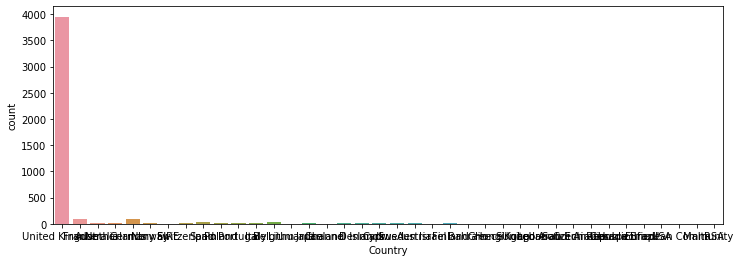

In [7]:
# Graficando esta información:

df_customer_country = customer_country=df[["Country","CustomerID"]].drop_duplicates()

plt.figure(figsize=(12,4))
sns.countplot(data=df_customer_country, x="Country")

In [8]:
# Juntando todos los no pertenecientes al reino unido:
df_customer_country[df_customer_country["Country"] != "United Kingdom"].agg({'CustomerID': 'sum', 'CustomerID': 'nunique'})

CustomerID    422
dtype: int64

In [9]:
# Para que sea mas fácil el gráfico:

df_uk_vs_rest = pd.DataFrame(np.array([["UK",3950], ["Others", 422]]),
                   columns=["Country", "Total Costumers"])


#nota, se puede vincular directamente a los arrays creados anteriormente por si se actualiza la información a futuro
df_uk_vs_rest

,Country,Total Costumers
0,UK,3950
1,Others,422


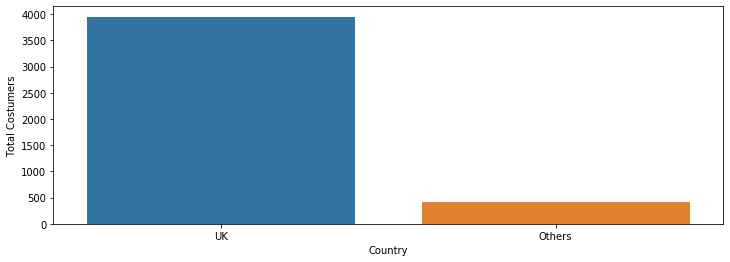

In [10]:
plt.figure(figsize=(12,4))
g = sns.barplot(data=df_uk_vs_rest, x="Country", y="Total Costumers")

In [11]:
# Chequeando valores faltantes:

print(df.isnull().sum(axis=0))

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [12]:
# Eliminando esas filas con valores faltantes:

df = df[pd.notnull(df['CustomerID'])]

In [13]:
# Valores mínimos:

df.Quantity.min()

-80995

In [14]:
# Eliminando valores negativos:

df = df[(df['Quantity']>0)]

In [15]:
print(df.shape)
print("______________________________")
print(df.info())

(397924, 8)
______________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB
None


In [15]:
df.Quantity.min()

1

In [16]:
def unique_counts(df):
    """
    Función para ver los valores únicos en cada columna.
    """
    for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)


unique_counts(df)

InvoiceNo :  18536
StockCode :  3665
Description :  3877
Quantity :  302
InvoiceDate :  17286
UnitPrice :  441
CustomerID :  4339
Country :  37


In [17]:
# Añadiendo una columna con el precio total:

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [18]:
# Primer pedido en el dataset:

df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [19]:
# Último pedido en el dataset:

df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [20]:
# Calculando RECENCY:

import datetime as dt
NOW = dt.datetime(2011,12,10)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

## Segmentación de Clientes con RFM 

En ésta sección se procederá a aplicar el método RFM descrito anteriormente.

En primer lugar necesitaremos crear la tabla:

In [21]:
# Creando la tabla:

tabla_rfm = df.groupby("CustomerID").agg({"InvoiceDate": lambda x: (NOW - x.max()).days,
                                          "InvoiceNo": lambda x: len(x),
                                          "TotalPrice": lambda x: x.sum()})

tabla_rfm["InvoiceDate"] = tabla_rfm["InvoiceDate"].astype(int)

tabla_rfm.rename(columns={"InvoiceDate": "recency", 
                         "InvoiceNo": "frequency", 
                         "TotalPrice": "monetary_value"}, inplace=True)

In [22]:
tabla_rfm.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [23]:
# Chequeando los datos del primer cliente como ejemplo:

primer_cliente = df[df["CustomerID"] == 12346.0]
primer_cliente

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6


El primer cliente solo ha comprado 1 vez, compró un solo producto (StockCode 26166), a un precio unitario de $1.04, en una gran cantidad (Quantity = 74215).

### Separando las métricas

La forma más sencilla de dividir las métricas en segmentos es mediante cuartiles (quantiles).
* Esto nos da un punto de partida para el análisis detallado.
* 4 segmentos son fáciles de entender y explicar.

In [24]:
quantiles = tabla_rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict() #convirtiendolo en diccionario

In [25]:
quantiles

{'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'monetary_value': {0.25: 307.24499999999995,
  0.5: 674.4499999999998,
  0.75: 1661.64}}

En recency, es mejor mientras menor percentil sea (compra mas actual).
Mientras que en frequency y monetary_value, es mejor mientras se encuentre en un percentil mas alto.

### Creando la tabla segmentada

In [26]:
tabla_segmentada = tabla_rfm

In [27]:
def RScore(x,p,d):
    """
    Función que da uno de 4 valores al recency (R) del cliente, en función de en qué percentil se encuentre.
    """
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    """
    Función equivalente que se usa para calcular valores monetary_value (M) y frequency (F), en función de en qué percentil se encuentre.
    """
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [28]:
tabla_segmentada['r_quartile'] = tabla_segmentada['recency'].apply(RScore, args=('recency',quantiles,))
tabla_segmentada['f_quartile'] = tabla_segmentada['frequency'].apply(FMScore, args=('frequency',quantiles,))
tabla_segmentada['m_quartile'] = tabla_segmentada['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
tabla_segmentada.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


Básicamente lo que obtenemos para cada cliente, es un punto en un espacio 3D, según los valores que tenga en cada uno de los 3 ejes (r_quartile, f_quartile y m_quartile)

Text(0.5, 0, 'm_quartile')

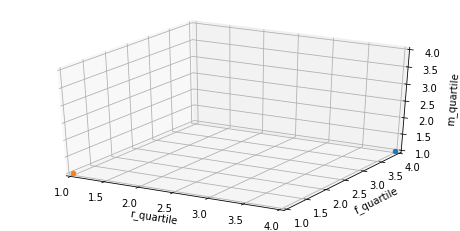

In [29]:
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection='3d')

point = (4, 4, 1)    # Ejemplo para el cliente 12346.0 
point2 = (1, 1, 1)   # Ejemplo para el cliente 12347.0 
ax.scatter(*point)
ax.scatter(*point2)

ax.set_xlim([1,4]) #Limitando los ejes a 4 como máximo, ya que es el puntaje máximo (peor caso).
ax.set_ylim([1,4]) #Limitando los ejes a 1 como mínimo, ya que es el puntaje mínimo (mejor caso).
ax.set_zlim([1,4])

ax.set_xlabel('r_quartile')
ax.set_ylabel('f_quartile')
ax.set_zlabel('m_quartile')

En éste gráfico, puede verse que el punto naranja representa un cliente mas valioso para nosotros

Para que sea mas sencillo de analizar, podemos sumar los valores de cada uno y asi segmentar.

In [30]:
tabla_segmentada['RFMScore'] = tabla_segmentada["r_quartile"] + tabla_segmentada["f_quartile"] + tabla_segmentada["m_quartile"]
tabla_segmentada.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,9
12347.0,2,182,4310.00,1,1,1,3
12348.0,75,31,1797.24,3,3,1,7
12349.0,18,73,1757.55,2,2,1,5
12350.0,310,17,334.40,4,4,3,11


Nuestros mejores clientes van a ser aquellos con RFMScore más bajo (1+1+1 = 3 sería el mejor cliente)

In [31]:
tabla_segmentada[tabla_segmentada['RFMScore']== 3].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
14646.0,1,2080,280206.02,1,1,1,3
18102.0,0,431,259657.30,1,1,1,3
17450.0,8,337,194550.79,1,1,1,3
14911.0,1,5677,143825.06,1,1,1,3
14156.0,9,1400,117379.63,1,1,1,3
17511.0,2,963,91062.38,1,1,1,3
16684.0,4,277,66653.56,1,1,1,3
14096.0,4,5111,65164.79,1,1,1,3
13694.0,3,568,65039.62,1,1,1,3


In [32]:
# Mejor caso: 3 (1+1+1)
# Peor caso: 12 (4+4+4)

def clasificador(num):
    if num <= 3:
        return "A"
    elif num <= 6:
        return "B"
    elif num <= 9:
        return "C"
    elif num <= 12:
        return "D"

In [33]:
tabla_segmentada['Nivel de Cliente'] = tabla_segmentada["RFMScore"].map(clasificador)
tabla_segmentada.sort_values('RFMScore', ascending=True)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Nivel de Cliente
CustomerID,,,,,,,,
16592.0,4,216,4113.68,1,1,1,3,A
14110.0,3,156,5683.15,1,1,1,3,A
14121.0,3,159,2780.15,1,1,1,3,A
14125.0,10,167,2740.43,1,1,1,3,A
14132.0,2,200,3586.03,1,1,1,3,A
...,...,...,...,...,...,...,...,...
12837.0,173,12,134.10,4,4,4,12,D
16498.0,161,15,100.97,4,4,4,12,D
17245.0,204,9,171.45,4,4,4,12,D


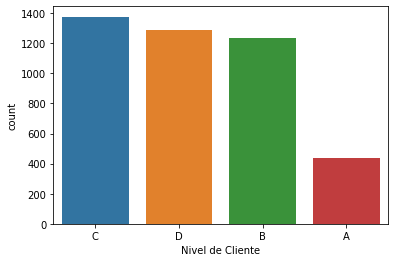

In [34]:
sns.countplot(x= "Nivel de Cliente", 
              data= tabla_segmentada, 
              order = tabla_segmentada["Nivel de Cliente"].value_counts().index)

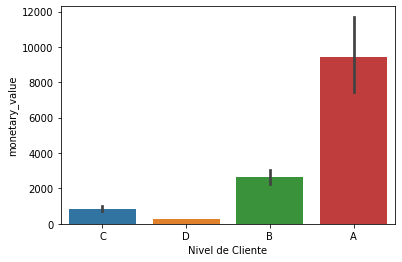

In [35]:
sns.barplot(x="Nivel de Cliente", 
            y="monetary_value", 
            data= tabla_segmentada, 
            order = tabla_segmentada["Nivel de Cliente"].value_counts().index)

Podemos ver que si bien los clientes A son poca cantidad en comparación a las otras categorías, son por mucho los que mas ganancia le dan al negocio.